In [1]:
# Install libraries if you haven't already
install.packages("ggplot2")
install.packages("dplyr")

# Load libraries
library(ggplot2)
library(dplyr)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
# Load the USArrests dataset
data("USArrests")

# View the dataset
head(USArrests)
summary(USArrests)


,Murder,Assault,UrbanPop,Rape
,<dbl>,<int>,<int>,<dbl>
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


     Murder          Assault         UrbanPop          Rape      
 Min.   : 0.800   Min.   : 45.0   Min.   :32.00   Min.   : 7.30  
 1st Qu.: 4.075   1st Qu.:109.0   1st Qu.:54.50   1st Qu.:15.07  
 Median : 7.250   Median :159.0   Median :66.00   Median :20.10  
 Mean   : 7.788   Mean   :170.8   Mean   :65.54   Mean   :21.23  
 3rd Qu.:11.250   3rd Qu.:249.0   3rd Qu.:77.75   3rd Qu.:26.18  
 Max.   :17.400   Max.   :337.0   Max.   :91.00   Max.   :46.00  

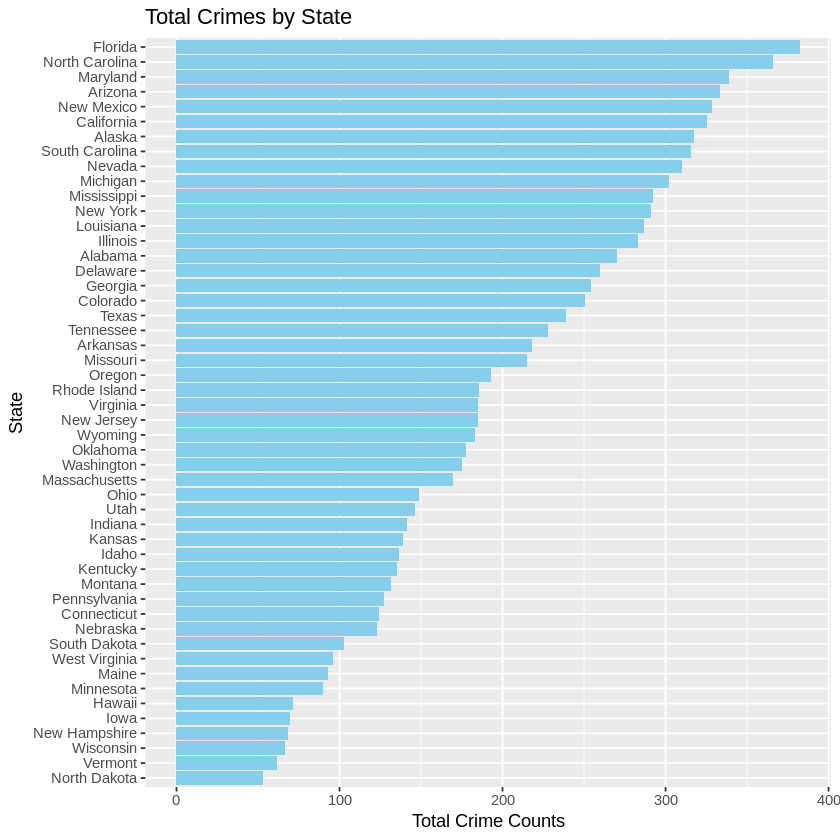

In [3]:
# Summing up the crime values for each state
USArrests$TotalCrime <- rowSums(USArrests[, c("Murder", "Assault", "Rape")])

# Bar chart of Total Crimes by State
ggplot(USArrests, aes(x = reorder(row.names(USArrests), TotalCrime), y = TotalCrime)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(title = "Total Crimes by State", x = "State", y = "Total Crime Counts") +
  coord_flip() # To make the chart more readable


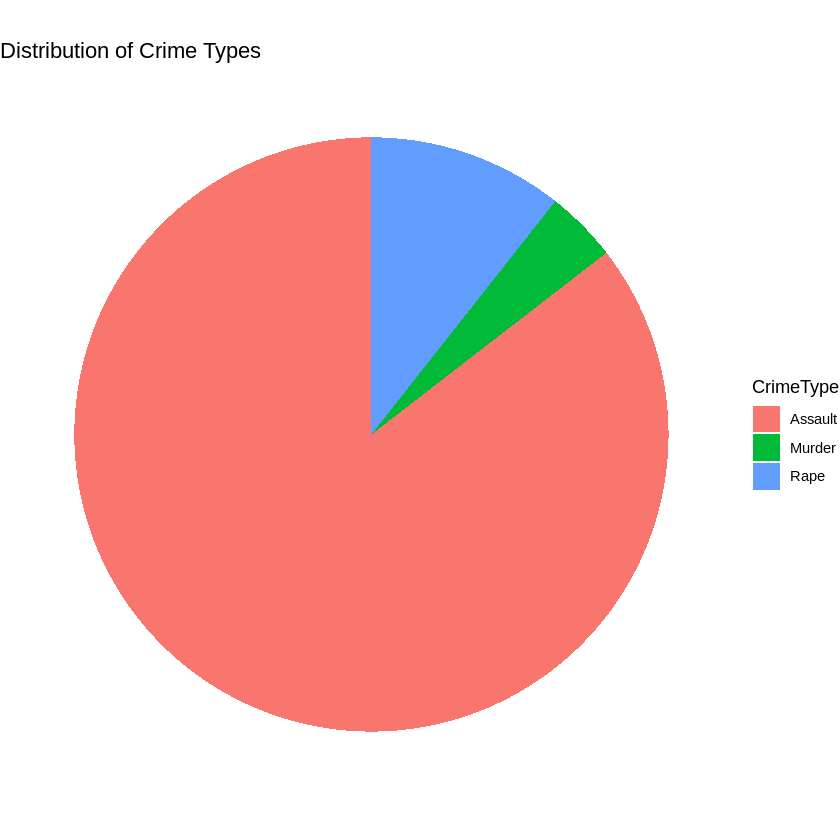

In [4]:
# Calculate the total sum for each crime type
crime_totals <- colSums(USArrests[, c("Murder", "Assault", "Rape")])

# Create a data frame for the pie chart
crime_data <- data.frame(
  CrimeType = names(crime_totals),
  Count = crime_totals
)

# Plot Pie chart
ggplot(crime_data, aes(x = "", y = Count, fill = CrimeType)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y") +
  labs(title = "Distribution of Crime Types") +
  theme_void()


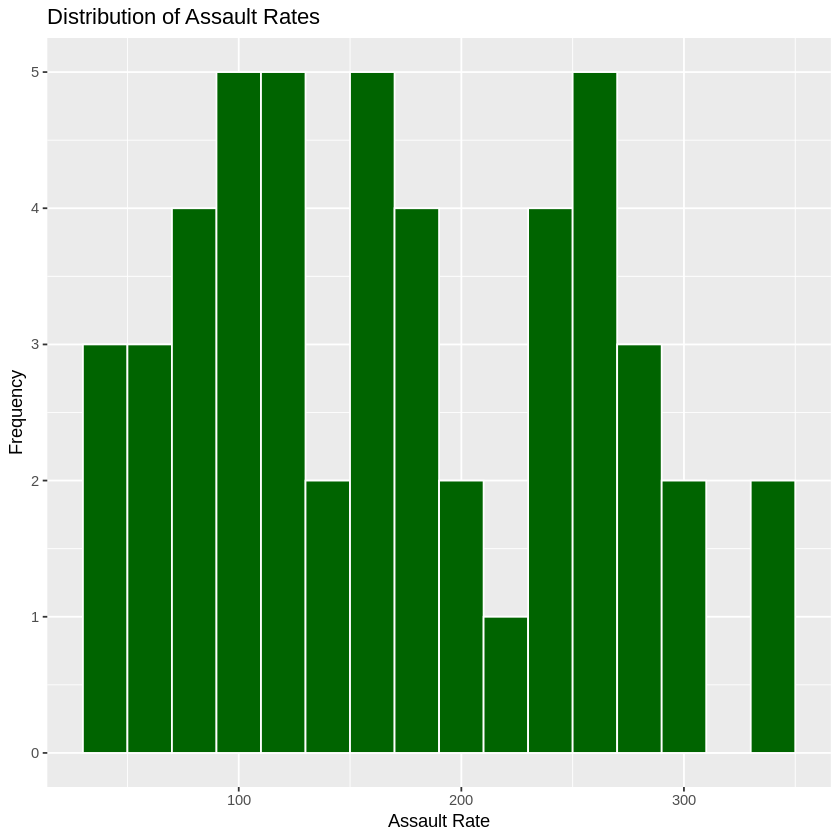

In [5]:
# Histogram of Assault Rates
ggplot(USArrests, aes(x = Assault)) +
  geom_histogram(binwidth = 20, fill = "darkgreen", color = "white") +
  labs(title = "Distribution of Assault Rates", x = "Assault Rate", y = "Frequency")


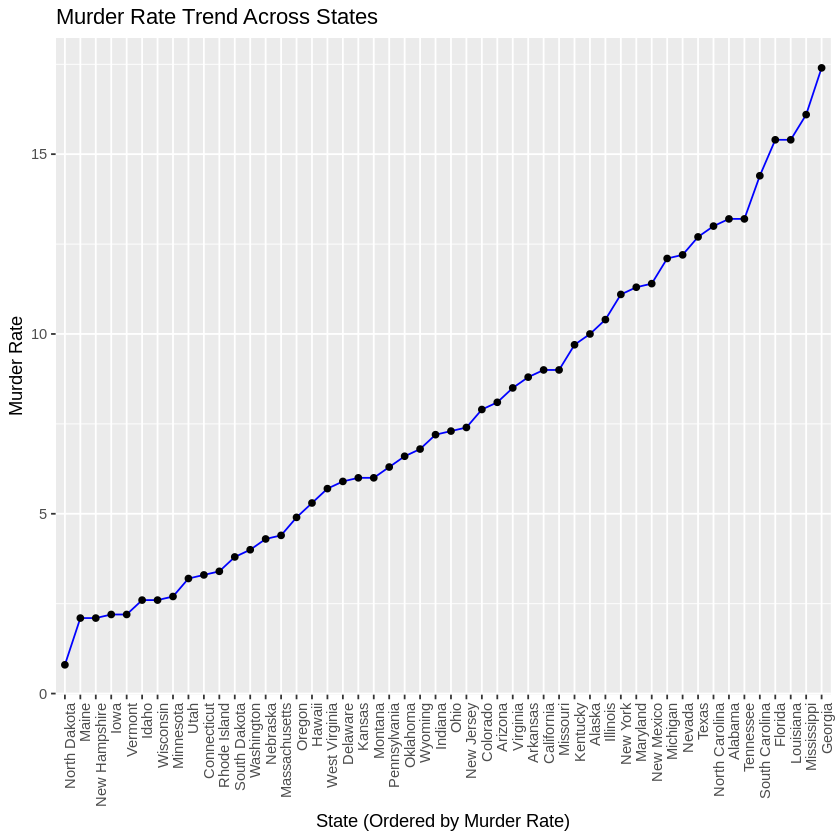

In [6]:
# Add row names as a column
USArrests$State <- row.names(USArrests)

# Timeline Chart
ggplot(USArrests, aes(x = reorder(State, Murder), y = Murder, group = 1)) +
  geom_line(color = "blue") +
  geom_point() +
  labs(title = "Murder Rate Trend Across States", x = "State (Ordered by Murder Rate)", y = "Murder Rate") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))


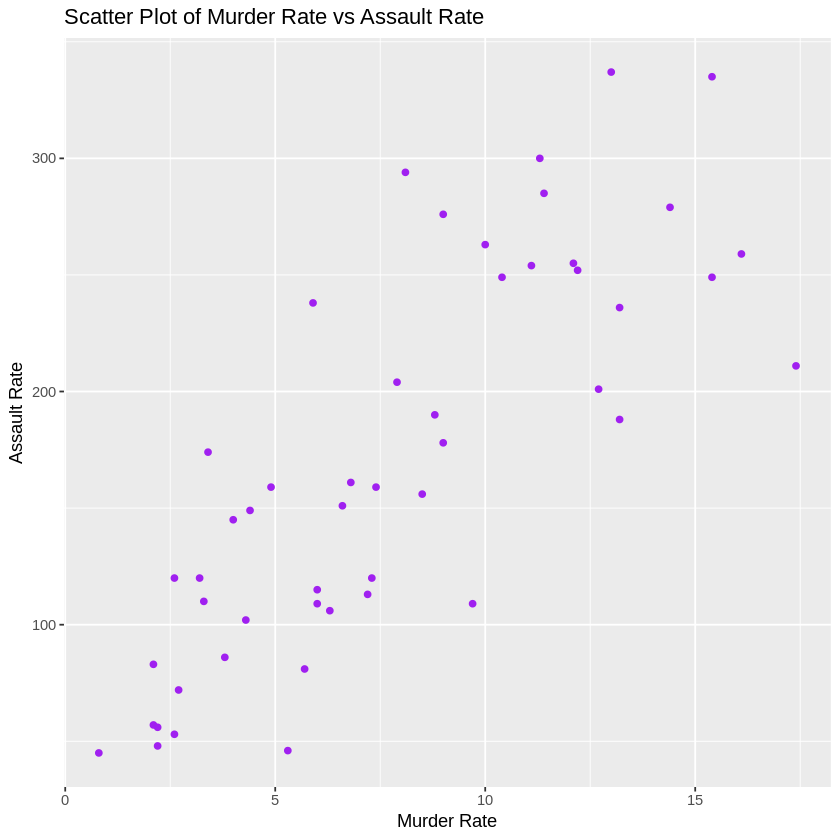

In [7]:
# Scatter plot of Murder vs Assault Rates
ggplot(USArrests, aes(x = Murder, y = Assault)) +
  geom_point(color = "purple") +
  labs(title = "Scatter Plot of Murder Rate vs Assault Rate", x = "Murder Rate", y = "Assault Rate")
